# Regression 

In regression tasks, the target variable typically has continuous values, such as a country's GDP, or the price of a house

To conceptualize regression problems, let's use a dataset containing women's health data to predict blood glucose levels. We load the dataset as a pandas DataFrame, and print the first five rows. It contains features including number of pregnancies, triceps skinfold measurements, insulin levels, body mass index, known as BMI, age in years, and diabetes status, with one indicating a diagnosis, and zero representing the absence of a diagnosis.

In [1]:
import pandas as pd
import numpy as np
# Read the data
diabetics_df = pd.read_csv('../../datasets/diabetics/diabetes_clean.csv')

# Print the first 5 rows of the data
diabetics_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
X = diabetics_df.drop('glucose', axis=1)
y = diabetics_df['glucose']

print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


## Making priction from a single feature

Using BMI index

In [3]:
# making X_bmi 

X_bmi = np.array(X[['bmi']])

print(X_bmi.shape, y.shape)

# reshaping to 2d array

X_bmi = X_bmi.reshape(-1,1)

(768, 1) (768,)


## Ploting glucose vs Body mass index

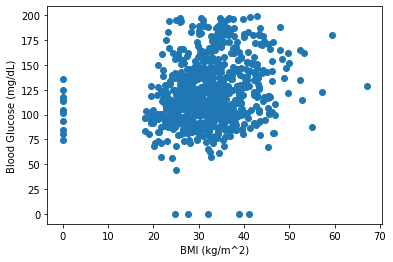

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X_bmi, y)

plt.ylabel('Blood Glucose (mg/dL)')
plt.xlabel('BMI (kg/m^2)')

plt.show()

## Fitting a regression model


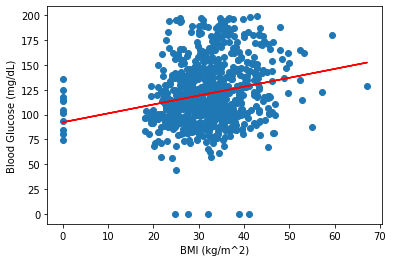

In [5]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_bmi, y)

prediction = reg.predict(X_bmi)

plt.scatter(X_bmi, y)
plt.plot(X_bmi, prediction, color='red')
plt.ylabel('Blood Glucose (mg/dL)')
plt.xlabel('BMI (kg/m^2)')

plt.show()



# Regression Machanics 
in 2D,
y = mx + b

- y is the *target* 
- x is the *single feature*
- a, b = *parameter/co-efficenet,slope-intercept*

How do we choose a and b?
 - define an error funcion for any given line
 - chose he line ha minimizes the error function

 *Error Function* = *Loss function* = *Cost Function*


 ## Ordinary Least Square
 By adding all the squared residuals, we calculate the residual sum of squares, or RSS. This type of linear regression is called Ordinary Least Squares, or OLS, where we aim to minimize the RSS.

 OLS minimises RSS

 RSS = SUM( yi - y'i ) ^2 

 ## Mean Squared Error

 MSE = 1 / n * sum(y1 - y'1)^2

 - MSE is measued in target units, squared

 RMSE = root(MSE)

In [6]:
 # Ordinary Least Squares (OLS) Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()

reg.fit(X_train, y_train, sample_weight=1.2)

y_pred = reg.predict(X_test)

score = reg.score(X_test, y_test)

print(f"Score is :{score}")

rmse_score = np.sqrt(np.mean((y_pred - y_test)**2))

print(f"RMSE score is :{rmse_score}")

print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Score is :0.2997416970153668
RMSE score is :26.545738366329484
Predictions: [121.03846902  95.84229978], Actual Values: 668     98
324    112
Name: glucose, dtype: int64


## K Fold Cross Validation

In [7]:
# import k-fold cross validation
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)





# Regression without SK-LEARN

In [8]:
import random

class LinearRegression:
    X = None
    y = None
    sample_weight = None
    w = None
    b = None

    def __init__(self):
        self.w = random.random()
        self.b = random.random()
        pass

    def fit(self, X, y, sample_weight=None):
        self.X = X
        self.y = y
       
        self.sample_weight = sample_weight
        

    def train_test_split(self, X, y, test_size=.2, random_state=42):
        np.random.seed(random_state)
        X_train = X[:int(len(X)*(1-test_size))]
        X_test = X[int(len(X)*(1-test_size)):]
        y_train = y[:int(len(y)*(1-test_size))]
        y_test = y[int(len(y)*(1-test_size)):]
        return X_train, X_test, y_train, y_test
    
    def predict(self, X):
        self.X = X
        y_pred = np.dot(self.X, self.w) + self.b
        return y_pred
    
    def score(self, X, y):
        self.X = X
        self.y = y
        y_pred = np.dot(self.X, self.w) + self.b
        score = np.mean((y_pred - self.y)**2)
        return score
        
    

    

In [9]:
reg = LinearRegression()

X = diabetics_df.drop('glucose', axis=1)
y = diabetics_df['glucose']

X_train, X_test, y_train, y_test = reg.train_test_split(X, y, test_size=0.2, random_state=42)

reg.fit(X_train, y_train, sample_weight=1.2)

y_pred = reg.predict(X_test)

score = reg.score(X_test, y_test)

print(f"Score is :{score}")

rmse_score = np.sqrt(np.mean((y_pred - y_test)**2))

print(f"RMSE score is :{rmse_score}")

print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

# mean squared error
from sklearn.metrics import mean_squared_error

ValueError: operands could not be broadcast together with shapes (154,8) (154,) 